In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yaminh/crop-yield-prediction")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'crop-yield-prediction' dataset.
Path to dataset files: /kaggle/input/crop-yield-prediction


In [ ]:
cy=pd.read_excel("/root/.cache/kagglehub/datasets/yaminh/crop-yield-prediction/versions/1/crop yield data sheet.xlsx")

In [ ]:
cy

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cy.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [ ]:
cy.tail()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,:,NaN,NaN,NaN,NaN


In [ ]:
cy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [ ]:
cy.isnull().sum()

,0
Rain Fall (mm),10
Fertilizer,10
Temperatue,9
Nitrogen (N),10
Phosphorus (P),10
Potassium (K),10
Yeild (Q/acre),10


In [ ]:
cy=cy.dropna()

In [ ]:
ind=cy[["Rain Fall (mm)","Fertilizer","Temperatue","Nitrogen (N)","Phosphorus (P)","Potassium (K)"]]
dep=cy["Yeild (Q/acre)"]

In [ ]:
LR=LinearRegression()
LR.fit(ind,dep)

LinearRegression()

In [ ]:
Rainfall=int(input("enter the amount of Rainfall:"))
Fertilizer=int(input("enter the amount of Fertilizer:"))
Temperature=int(input("enter the temperature:"))
Nitrogen=int(input("enter the amount of nitrogen:"))
Phosphorus=int(input("enter the amount of Phosphorus:"))
Potassium=int(input("enter the amount of Potassium:"))
pred=LR.predict([[Rainfall,Fertilizer,Temperature,Nitrogen,Phosphorus,Potassium]])
print(pred)

enter the amount of Rainfall:1230
enter the amount of Fertilizer:80
enter the temperature:28
enter the amount of nitrogen:80
enter the amount of Phosphorus:24
enter the amount of Potassium:20
[11.20673916]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


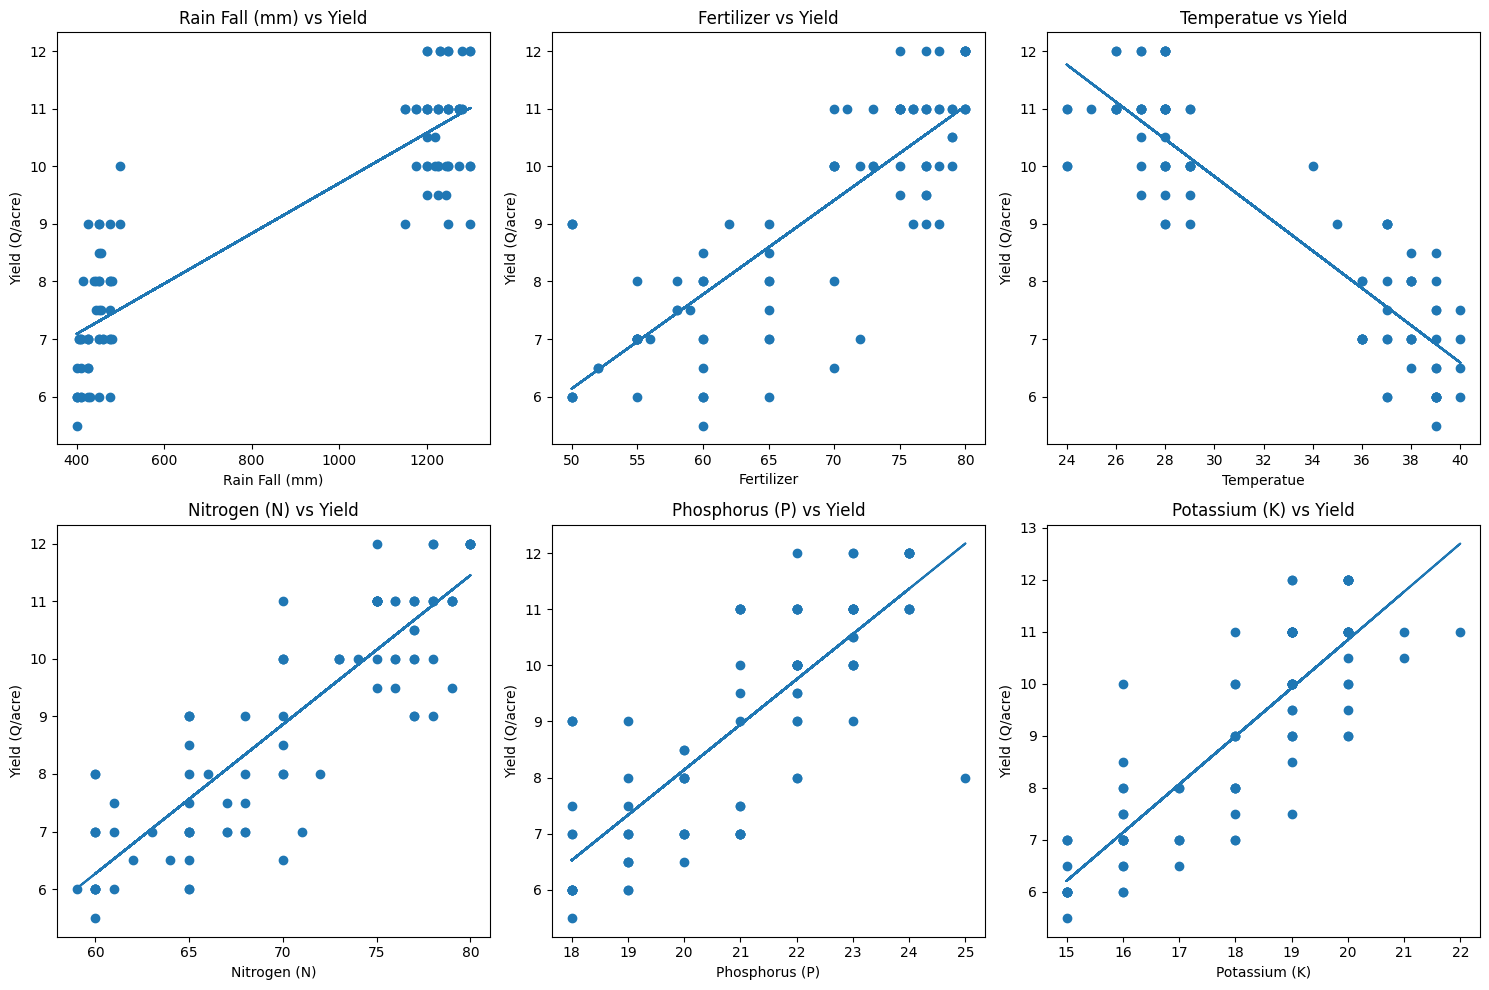

In [ ]:
# --------- 2×3 SUBPLOTS FOR ALL FEATURES vs YIELD ---------
features = [
    "Rain Fall (mm)",
    "Fertilizer",
    "Temperatue",
    "Nitrogen (N)",
    "Phosphorus (P)",
    "Potassium (K)"
]

y = cy["Yeild (Q/acre)"].values

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    X_feature = cy[feature].values.reshape(-1, 1)

    # Fit simple regression for plotting
    model_feature = LinearRegression()
    model_feature.fit(X_feature, y)
    y_pred_line = model_feature.predict(X_feature)

    # Subplot position
    plt.subplot(2, 3, i)

    # Plot actual data
    plt.scatter(X_feature, y)

    # Plot regression line
    plt.plot(X_feature, y_pred_line)

    plt.xlabel(feature)
    plt.ylabel("Yield (Q/acre)")
    plt.title(f"{feature} vs Yield")

plt.tight_layout()
plt.show()
